In [1]:
# импортируем библиотеки

import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [ ]:
# это для cuda .
#torch.cuda.memory_summary(device=None, abbreviated=True)

'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |      0 B   |      0 B   |      0 B   |      0 B   |\n|---------------------------------------------------------------------------|\n| Active memory         |      0 B   |      0 B   |      0 B   |      0 B   |\n|---------------------------------------------------------------------------|\n| Requested memory      |      0 B   |      0 B   |      0 B   |      0 B   |\n|--------------------------------------------------

In [ ]:
# это для cuda. принудительно освобождение памяти, что иногда, но очень редко, помогает решить проблему с отказом
# cuda использовать память
#import gc
#gc.collect()

#torch.cuda.empty_cache()

In [2]:
import torchvision.datasets

In [3]:
# загружаем сразу в трайн и тест
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

In [4]:
# формируем датасеты для обучения, тестирования, целевые переменные
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:66: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:81: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:71: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


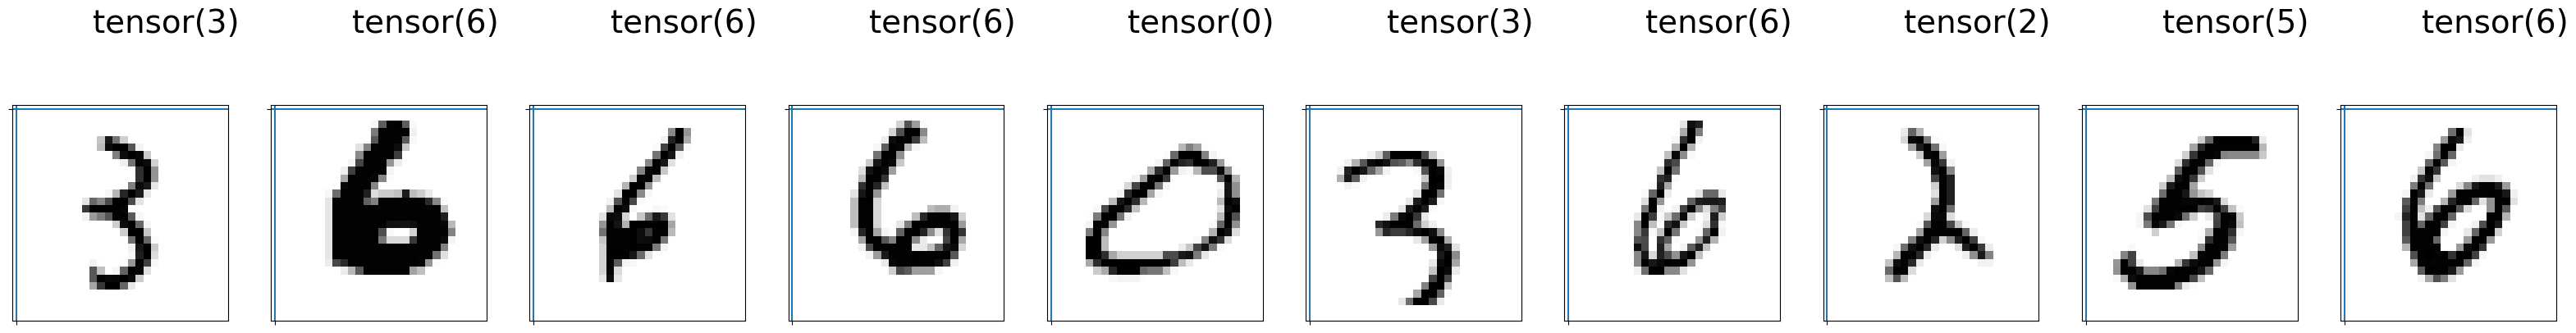

In [5]:
# посмотрим, что пришло

import numpy as np
import matplotlib.pyplot as plt

# посмотрим какие-то произвольные изображения из датасета
count = 0
sample_size = 10
plt.figure(figsize=(40, 20))
for i in np.random.permutation(X_train.shape[0])[:sample_size]:
    count = count + 1
    plt.subplot(1, sample_size, count)
    plt.axhline('')
    plt.axvline('')
    plt.text(x=10, y=-10, s=y_train[i], fontsize=28)
    plt.imshow(X_train[i].reshape(28, 28), cmap=plt.cm.Greys)
plt.show()

In [6]:
# сколько изображений в трейне и тесте
len(y_train), len(y_test)

(60000, 10000)

image:
tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  42, 118, 219,
         166, 118, 118,   6,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 103, 242, 254, 254,
         254, 254, 254,  66,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0, 

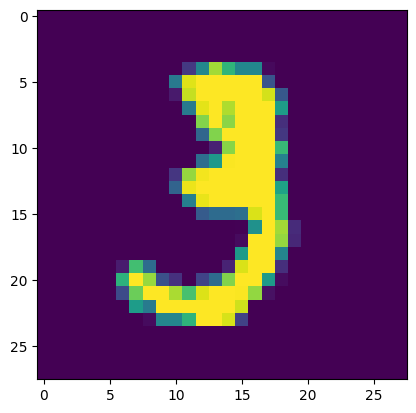

tensor(3)


In [7]:
# нарисуем, c чем мы имеем дело
import matplotlib.pyplot as plt

im_number = 10

# вот как хранятся изображения в компьютере
print(f"image:\n{X_train[im_number, :, :]}")

# а так их видим мы
plt.imshow(X_train[im_number, :, :])

plt.show()
print(y_train[im_number])

In [8]:
# посмотртим тип "картинок"
type(X_train[10, :, :])

torch.Tensor

In [9]:
X_train.shape

torch.Size([60000, 28, 28])

In [6]:
# unsqueeze - Возвращает новый тензор с увеличенной на 1 размерностью, которая вставляется в указанную позицию.
# было torch.Size([60000, 28, 28])  ---- станет torch.Size([60000, 1, 28, 28])
# и все значения - во float

X_train = X_train.unsqueeze(1).float()
X_test = X_test.unsqueeze(1).float()

In [11]:
X_train.shape

torch.Size([60000, 1, 28, 28])

In [12]:
X_test.shape

torch.Size([10000, 1, 28, 28])

In [7]:
import torch.nn as nn  # Импортируем модуль нейронных сетей из PyTorch

class ResidualBlock(nn.Module):  # Определяем класс ResidualBlock, который наследует nn.Module
    def __init__(self, in_channels, out_channels):  # Конструктор с количеством входных и выходных каналов
        super(ResidualBlock, self).__init__()  # Инициализируем родительский класс
        # Первый сверточный слой: 3x3 фильтры, изменяем от in_channels к out_channels
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)
        self.act1 = nn.ReLU()  # Активация ReLU после первого сверточного слоя
        # Второй сверточный слой: 3x3 фильтры, выход той же размерности, что и первый
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1)
        self.act2 = nn.ReLU()  # Активация ReLU после второго сверточного слоя

        # Приведение размерности входа к выходу (для residual connection)
        if in_channels != out_channels:  # Если количество входных каналов не совпадает с выходными
            self.shortcut = nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=1)  # Слой свертки 1x1 для изменения размерности
        else:
            self.shortcut = None  # Если совпадает, то нет необходимости в преобразовании

    def forward(self, x):  # Метод, определяющийForward-проход
        # Если shortcut не равен None, то применяем его к входу x, иначе используем x как есть
        residual = x if self.shortcut is None else self.shortcut(x)

        out = self.conv1(x)  # Пропускаем вход через первый сверточный слой
        out = self.act1(out)  # Применяем активацию ReLU
        out = self.conv2(out)  # Пропускаем результат через второй сверточный слой
        out += residual  # Добавляем 'резidual' (или shortcut)
        out = self.act2(out)  # Применяем активацию ReLU к результату

        return out  # Возвращаем конечный результат


In [8]:
# Основная модель с residual connections

# Определяем класс ResidualModel, который наследует nn.Module
class ResidualModel(nn.Module):
    def __init__(self):
        # Инициализируем родительский класс
        super(ResidualModel, self).__init__()
        # Определяем первый остаточный блок: принимает 1 канал (например, изображение в оттенках серого) и выводит 16 каналов
        self.layer1 = ResidualBlock(1, 16)
        # Определяем второй остаточный блок: принимает 16 каналов и выводит 32 канала
        self.layer2 = ResidualBlock(16, 32)
        # Средний слой для уменьшения размерности: усредняем по 2x2 области с шагом 2
        self.pool = nn.AvgPool2d(kernel_size=2, stride=2)
        # Полносвязный слой: принимает входные данные размерности 7 * 7 * 32 и выводит 120 значений
        self.fc1 = nn.Linear(7 * 7 * 32, 120)
        # Полносвязный слой: принимает 120 значений и выводит 10 (количество классов, например, в MNIST)
        self.fc2 = nn.Linear(120, 10)

    def forward(self, x):   # Метод, определяющий Forward-проход
        x = self.layer1(x)  # Пропускаем вход через первый остаточный блок
        x = self.pool(x)    # Применяем среднюю пулинг операцию для уменьшения размерности

        x = self.layer2(x)  # Пропускаем результат через второй остаточный блок
        x = self.pool(x)    # Применяем среднюю пулинг операцию для уменьшения размерности

        x = x.view(x.size(0), -1)  # Преобразуем тензор в плоский (flatten); делает 2D тензор (размерность: [batch_size, features])

        x = self.fc1(x)     # Пропускаем через первый полносвязный слой
        x = self.fc2(x)     # Пропускаем через второй полносвязный слой (выход класса)

        return x            # Возвращаем выходной тензор


In [9]:
# определяем, где будет обучаться наша СNN
# если есть граф процессор от Nvidia, то на нем. Если нет, то на cpu

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
#device = "cpu"

# Инициализация модели и других компонентов
model = ResidualModel().to(device)
# В качестве функции потерь будем использовать CrossEntropyLoss()
loss_fn = nn.CrossEntropyLoss()

# model.parameters() возвращает итератор, который содержит все параметры (веса и смещения) вашего нейронного сети
# lr=0.001 - аргумент, задающий скорость обучения (learning rate) для оптимизатора
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# ЕСЛИ ВЫ ОБУЧИТЕ НЕЙРОНКУ НА GPU или CPU ОНА ДЛЯ СВОЕЙ РАБОТЫ БУДЕТ ТРЕБОВАТЬ ИЛИ GPU, ИЛИ CPU
Поэтому не всегда возможно использование обучения на GPU просто потому, что сервер или компьютер пользователя не будет поддерживать расчеты на GPU

In [10]:
# Обучение с отображением величины ошибки
num_epochs = 50
train_loss_history = []
val_loss_history = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    # Обучающая выборка
    preds = model(X_train.to(device))
    loss = loss_fn(preds, y_train.to(device))
    loss.backward()
    optimizer.step()

    train_loss_history.append(loss.item())

    # Валидационная выборка
    model.eval()
    with torch.no_grad():
        val_preds = model(X_test.to(device))
        val_loss = loss_fn(val_preds, y_test.to(device))
        val_loss_history.append(val_loss.item())

    # Вывод информации
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')


Epoch [10/50], Train Loss: 2.0058, Val Loss: 1.8127
Epoch [20/50], Train Loss: 0.8787, Val Loss: 0.7660
Epoch [30/50], Train Loss: 0.3346, Val Loss: 0.3011
Epoch [40/50], Train Loss: 0.2168, Val Loss: 0.2064
Epoch [50/50], Train Loss: 0.1620, Val Loss: 0.1468


In [22]:
# import torch
# torch.cuda.empty_cache()

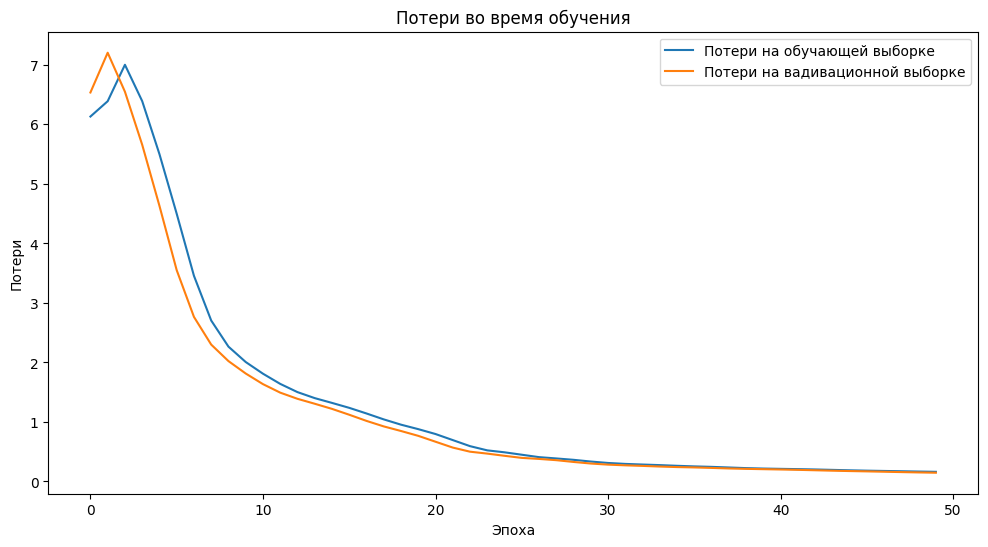

In [18]:
# График потерь
plt.figure(figsize=(12, 6))
plt.plot(train_loss_history, label='Потери на обучающей выборке')
plt.plot(val_loss_history, label='Потери на вадивационной выборке')
plt.title('Потери во время обучения')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend()
plt.show()

In [16]:
def show_results(model, X_test, y_test, num_images=9):
    model.eval()
    with torch.no_grad():
        batch_probs = model(X_test.to(device)).cpu().exp()  # Получаем вероятности

        # Получаем предполагаемые и действительные классы
        preds = torch.argmax(batch_probs, dim=1)

        # Выбираем случайные изображения для отображения
        indices = np.random.choice(len(X_test), num_images, replace=False)

        fig, axes = plt.subplots(3, 3, figsize=(15, 15))
        for i, idx in enumerate(indices):
            ax = axes[i // 3, i % 3]
            ax.imshow(X_test[idx].cpu().squeeze(), cmap='gray')

            true_label = y_test[idx].item()
            predicted_label = preds[idx].item()

            # Шаблон для отображения результатов
            result_text = f'Реальный класс: {true_label}\nПредсказанный класс: {predicted_label}\nПредсказания:\n'
            for class_index in range(batch_probs.shape[1]):
                result_text += f'Класс {class_index}: {batch_probs[idx][class_index]:.4f}\n'

            ax.set_title(result_text, fontsize=10)  # Уменьшаем размер шрифта заголовка
            ax.axis('off')

        plt.tight_layout(pad=2.0)  # Увеличиваем отступы между подграфиками
        plt.show()

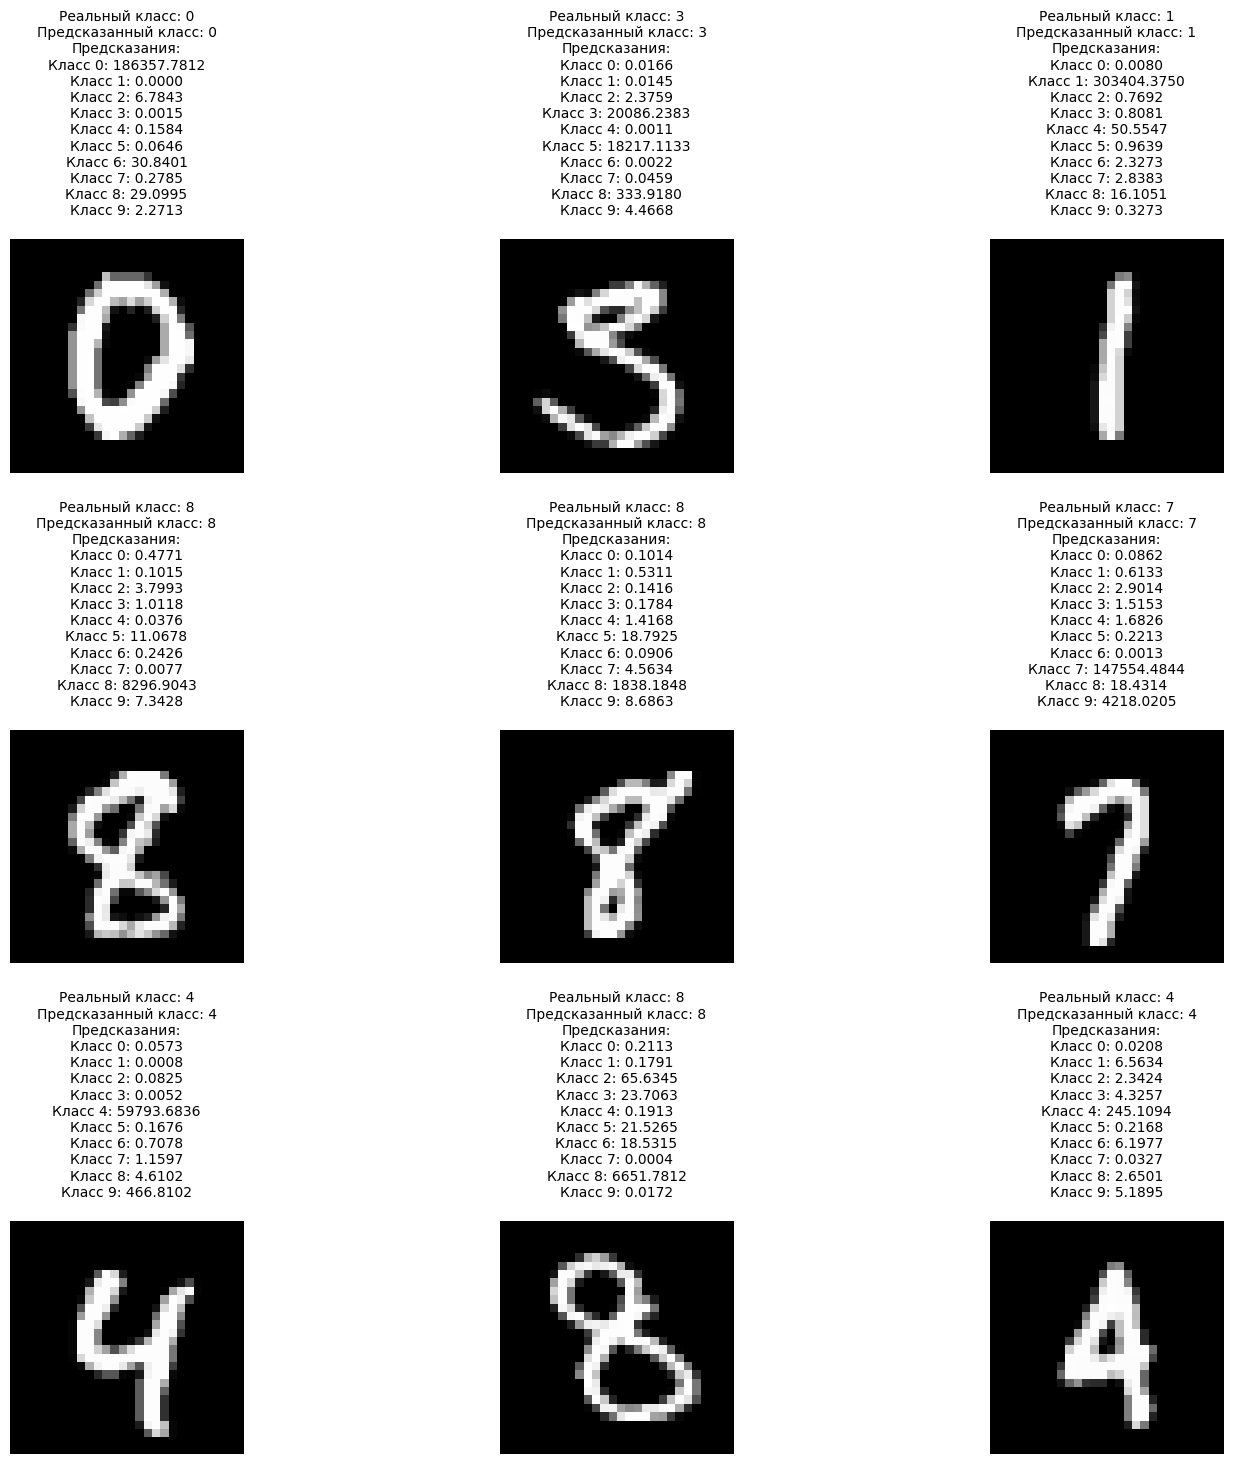

In [17]:
# Использование функции для отображения
show_results(model, X_test, y_test, num_images=9)  # Показать 9 изображений